# Ülkeler baz alındığında Temel İçme Suyuna Sahip Olmanın, Çocukların Ölümü Üzerine Etkisi

İncelediğiniz kaggle not defteri sadece kodları içermektedir.

Analiz üzerine yorumlar Medium hikayemde bulunmaktadır.

Medium Hikayem : https://16savasselim.medium.com/%C3%BClkeler-baz-al%C4%B1nd%C4%B1%C4%9F%C4%B1nda-temel-i%CC%87%C3%A7me-suyuna-sahip-olman%C4%B1n-%C3%A7ocuklar%C4%B1n-%C3%B6l%C3%BCm%C3%BC-%C3%BCzerine-etkisi-78befdb2f0f8

## İçindekiler

1.  Verilerin Düzenlenmesi
2.  Normal Dağılımının İncelenmesi
3.  Basit Regresyon Analizi

## 1-Verilerin Düzenlenmesi

### Kütüphaneler

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

### Temel İçme Suyu Verisinin Düzenlenmesi

In [37]:
# basicDrinkingWaterServices.csv -> En azından temel içme suyu hizmetlerini kullanan nüfus (%)

TemizSuİmkanı = pd.read_csv("../input/who-worldhealth-statistics-2020-complete/basicDrinkingWaterServices.csv")
TemizSuİmkanı = TemizSuİmkanı.drop('Indicator',1)
TemizSuİmkanı.columns = ["Lokasyon", "Periyot", "Su_Imkanı"]
TemizSuİmkanı = TemizSuİmkanı[TemizSuİmkanı.Periyot>2016]
TemizSuİmkanı = TemizSuİmkanı[TemizSuİmkanı.Periyot<2018]
TemizSuİmkanı.reset_index(drop=True)

,Lokasyon,Periyot,Su_Imkanı
0,Afghanistan,2017,57.32
1,Albania,2017,89.88
2,Algeria,2017,88.69
3,Andorra,2017,100.00
4,Angola,2017,27.44
...,...,...,...
185,Venezuela (Bolivarian Republic of),2017,95.72
186,Viet Nam,2017,92.64
187,Yemen,2017,54.70
188,Zambia,2017,41.95


In [38]:
len(TemizSuİmkanı.Lokasyon.unique()) # 190 Ayrı lokasyonda veri var.

190

(array([ 4.,  6.,  8., 10., 12.,  5., 11., 12., 27., 95.]),
 array([ 22.83 ,  30.547,  38.264,  45.981,  53.698,  61.415,  69.132,
         76.849,  84.566,  92.283, 100.   ]),
 <a list of 10 Patch objects>)

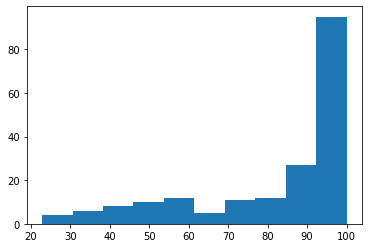

In [39]:
plt.hist(TemizSuİmkanı.Su_Imkanı) # Su imkanının histogramda dağılımı

### Çocuk Ölümü Oranları Verilerini Düzenleme

In [40]:
# Çocuk Ölüm Oranları
# neonatalMortalityRate.csv -> Çocukların yaşamın ilk 28 gününde ölme olasılığı.

In [41]:
ÇocukÖlümOranı = pd.read_csv("../input/who-worldhealth-statistics-2020-complete/neonatalMortalityRate.csv")
ÇocukÖlümOranı = ÇocukÖlümOranı.drop('Indicator',1)
ÇocukÖlümOranı = ÇocukÖlümOranı.drop('Dim1',1)
ÇocukÖlümOranı.columns = ["Lokasyon", "Periyot", "Cocuk_Olum_Oranı"]
ÇocukÖlümOranı = ÇocukÖlümOranı[ÇocukÖlümOranı.Periyot>2016]
ÇocukÖlümOranı = ÇocukÖlümOranı[ÇocukÖlümOranı.Periyot<2018]
ÇocukÖlümOranı.reset_index(drop=True)

,Lokasyon,Periyot,Cocuk_Olum_Oranı
0,Afghanistan,2017,37.98 [30.95-45.6]
1,Albania,2017,6.74 [6.24-7.22]
2,Algeria,2017,15.54 [14.95-16.13]
3,Andorra,2017,1.56 [0.44-5.51]
4,Angola,2017,29 [13.7-53.58]
...,...,...,...
188,Venezuela (Bolivarian Republic of),2017,14.65 [12.49-16.94]
189,Viet Nam,2017,10.98 [8.49-14.03]
190,Yemen,2017,26.67 [17.71-39.58]
191,Zambia,2017,23.94 [19.8-29.13]


In [42]:
# Bebek Ölüm Oranlarını float hale çevirme

def fonksiyon(ÇocukÖlümOranı):
    return ÇocukÖlümOranı['Cocuk_Olum_Oranı'].split("[")[0]

ÇocukÖlümOranı['Cocuk_Olum_Oranı'] = ÇocukÖlümOranı.apply(fonksiyon, axis=1)
ÇocukÖlümOranı['Cocuk_Olum_Oranı'] = ÇocukÖlümOranı['Cocuk_Olum_Oranı'].astype(float)

### Verileri Birleştirme

In [43]:
Analiz_1 = pd.merge(ÇocukÖlümOranı,TemizSuİmkanı, on='Lokasyon') # 2017 Yılı Su imkanına ulaşım ve çocuk ölümleri arası korelasyon analizi
Analiz_1 = Analiz_1.drop('Periyot_x',1)
Analiz_1 = Analiz_1.drop('Periyot_y',1)

### Veri Normalize

In [44]:
Analiz_1.Su_Imkanı = (Analiz_1.Su_Imkanı - Analiz_1.Su_Imkanı.min() )/ (Analiz_1.Su_Imkanı.max() - Analiz_1.Su_Imkanı.min())
Analiz_1.Cocuk_Olum_Oranı = (Analiz_1.Cocuk_Olum_Oranı - Analiz_1.Cocuk_Olum_Oranı.min() )/ (Analiz_1.Cocuk_Olum_Oranı.max() - Analiz_1.Cocuk_Olum_Oranı.min())

### Aykırı değerleri Temizleme

In [45]:
Analiz_1.Su_Imkanı = Analiz_1.Su_Imkanı[Analiz_1.Su_Imkanı<0.92]
#Analiz_1.Su_Imkanı = Analiz_1.Su_Imkanı[Analiz_1.Su_Imkanı>0]

Analiz_1.Cocuk_Olum_Oranı = Analiz_1.Cocuk_Olum_Oranı[Analiz_1.Cocuk_Olum_Oranı<0.90]
Analiz_1.Cocuk_Olum_Oranı = Analiz_1.Cocuk_Olum_Oranı[Analiz_1.Cocuk_Olum_Oranı>0.04]


Analiz_1.dropna(inplace=True)
Analiz_1.reset_index(drop=True)


,Lokasyon,Cocuk_Olum_Oranı,Su_Imkanı
0,Afghanistan,0.867523,0.446935
1,Albania,0.137617,0.868861
2,Algeria,0.343224,0.853440
3,Angola,0.657710,0.059738
4,Azerbaijan,0.266355,0.761177
...,...,...,...
91,Vanuatu,0.263084,0.850849
92,Viet Nam,0.236682,0.904626
93,Yemen,0.603271,0.412984
94,Zambia,0.539486,0.247765


In [46]:
# 45 adet ülkeyi verimizin normal dağılıma sahip olması için analizimizin dışında tuttuk. 
# Çok fazla temel su imkanına sahip olan ülke var olması, verinin dağılımını bozuyordu.

Analiz_1.drop([0,1,2,23,32,34,36,45,47,48,51,66,67,71,74,77,81,84,89,91,93,97,99,101,103,104,109,113,116,119,121,124,130,131,136,137,139,148,154,155,157,159,161,171,176], axis=0, inplace=True)

In [47]:
Analiz_1.reset_index(drop=True)
Analiz_1.head()

,Lokasyon,Cocuk_Olum_Oranı,Su_Imkanı
4,Angola,0.657710,0.059738
10,Azerbaijan,0.266355,0.761177
18,Benin,0.715187,0.458598
20,Bolivia (Plurinational State of),0.349533,0.716470
22,Botswana,0.396729,0.682908


Text(0.5, 1.0, 'X y arasındaki ilişki')

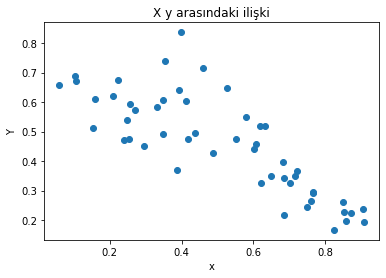

In [48]:
plt.scatter(Analiz_1.Su_Imkanı.values,Analiz_1.Cocuk_Olum_Oranı.values)
plt.xlabel('x')
plt.ylabel('Y')
plt.title('X y arasındaki ilişki')

## 2- Verinin Normal Dağılımının İncelenmesi

### Betimleyici İstatistik Yöntemleri ile Normal Dağılımı İnceleme



In [49]:
Analiz_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Cocuk_Olum_Oranı,51.0,0.459021,0.168402,0.166822,0.325701,0.473598,0.598598,0.836682
Su_Imkanı,51.0,0.510609,0.243185,0.059738,0.313917,0.525334,0.708889,0.907477


### Görselleştirme Yöntemleri ile Normal Dağılımı İnceleme

Bins metodu kısacası frekansa göre sayısal verileri gruplara böler. BINS = 9 için histogram oluşturalım ve dağılıma göre en uygun çan eğrisini (bell curve) çizdirerek değerlendirelim.

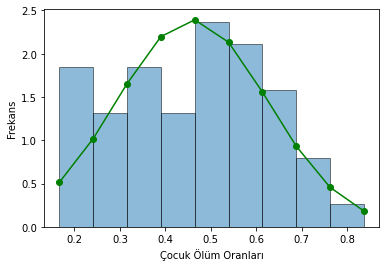

In [50]:
# Histogram plot parametreleri
_, bins, _ = plt.hist(Analiz_1.Cocuk_Olum_Oranı, bins = 9,
                      density = 1, alpha = 0.5,
                      ec= 'black' )

# Çan eğrisi için en uygun değerler
mu, sigma = stats.norm.fit(Analiz_1.Cocuk_Olum_Oranı)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Çocuk Ölüm Oranları")
plt.ylabel("Frekans")
plt.show()

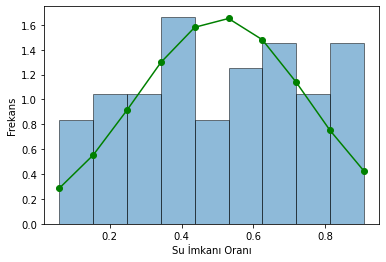

In [51]:
# Histogram plot parametreleri
_, bins, _ = plt.hist(Analiz_1.Su_Imkanı, bins = 9,
                      density = 1, alpha = 0.5,
                      ec= 'black' )

# Çan eğrisi için en uygun değerler
mu, sigma = stats.norm.fit(Analiz_1.Su_Imkanı)
best_fit_line = stats.norm.pdf(bins, mu, sigma)

# Çan eğrisi gösterimi
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Su İmkanı Oranı")
plt.ylabel("Frekans")
plt.show()

### Diğer Görselleştirme Yöntemleri ile Nomral Dağılımı İnceleme

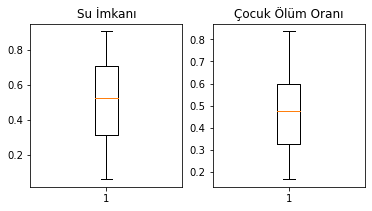

In [52]:
# 6'a 3'lük bir alan için grafik sahası oluşturuyoruz
plt.figure(figsize=(6, 3))

plt.subplot(121)
plt.boxplot(Analiz_1.Su_Imkanı)
plt.title("Su İmkanı")

plt.subplot(122)
plt.boxplot(Analiz_1.Cocuk_Olum_Oranı)
plt.title("Çocuk Ölüm Oranı")


plt.show()

### Kernel Density Estimation (KDE)

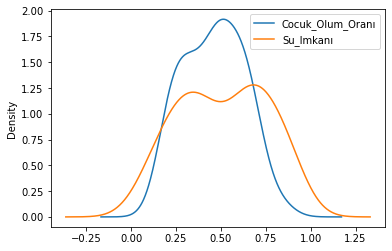

In [53]:
Analiz_1.plot.kde()

### Normallik Varsayım Testlerini Python ile inceleme

In [54]:
# Skewness (Çarpıklık) ve kurtosis (Basıklık) değerleri

m = Analiz_1.Cocuk_Olum_Oranı
i = Analiz_1.Su_Imkanı

print("Çocuk Ölüm Oranı")
print(f"Skewness: {stats.skew(m)} Kurtosis: {stats.kurtosis(m)}")
print("Su İmkanı Oranı")
print(f"Skewness: {stats.skew(i)} Kurtosis: {stats.kurtosis(i)}")

Çocuk Ölüm Oranı
Skewness: 0.04305823886579215 Kurtosis: -0.9378341136734898
Su İmkanı Oranı
Skewness: -0.07087111835685775 Kurtosis: -1.1755381669168072


### Shapiro-Wilk Testi

Normal dağılım sınaması için Shapiro-Wilk ve Kolmogorov-Smirnov en yaygın olarak kullanılan testler olup temelde hipotezleri aynıdır.

* H0: Değişken normal dağılıma sahiptir. p-value > 0.05
* H1: Değişken normal dağılıma sahip değildir. p-value < 0.05

In [55]:
m = Analiz_1.Cocuk_Olum_Oranı
i = Analiz_1.Su_Imkanı

print("Çocuk Ölüm Oranı")
print(f"T: {stats.shapiro(m)[0]} P-Value: {stats.shapiro(m)[1]}")
print("Su İmkanı Oranı")
print(f"T: {stats.shapiro(i)[0]} P-Value: {stats.shapiro(i)[1]}")

Çocuk Ölüm Oranı
T: 0.9705723524093628 P-Value: 0.23357179760932922
Su İmkanı Oranı
T: 0.9558517336845398 P-Value: 0.05555988848209381


* Her bir değişken için sonuçları incelerken hipotez reddi/kabülu için p-value’ya bakmamız yeterlidir. Buna göre;

* Çocuk Ölüm Oranları'nın ve Su İmkanı Oranları'nın p-value değerlerine baktığımızda 0.05 değerinden büyük olduğu için H0 hipotezini kabul etmiş oluyoruz.

### Kolmogorov-Smirnov
Shapiro-Wilk testi, normalliği belirlemek için popülerdir ve genellikle çok iyi performans gösterir, ancak evrensel olarak en iyisi değildir. Bir değişkeni incelerken tek bir teste bağlı kalmadan sonuçlarınızı doğrulamak için ek yöntemler kullanmanız gerekir. Bunun için Kolmagorov-Smirnov testi uygulanabilir.

In [56]:
# Kolmogorov–Smirnov test
m = Analiz_1.Cocuk_Olum_Oranı
i = Analiz_1.Su_Imkanı

m_kstest = stats.kstest(m, 'norm',
                         args=(m.mean(),
                               m.std()))
i_kstest = stats.kstest(i, 'norm',
                         args=(i.mean(),
                               i.std()))

print("Çocuk Ölüm Oranı")
print(f"T: {m_kstest[0]} P-Value: {m_kstest[1]}")
print("Su İmkanı Oranı")
print(f"T: {i_kstest[0]} P-Value: {i_kstest[1]}")

Çocuk Ölüm Oranı
T: 0.0755380499946155 P-Value: 0.9330153049609077
Su İmkanı Oranı
T: 0.0961349446980736 P-Value: 0.7323699437356262


In [57]:
Analiz_1.corr()

,Cocuk_Olum_Oranı,Su_Imkanı
Cocuk_Olum_Oranı,1.000000,-0.810782
Su_Imkanı,-0.810782,1.000000


## 3- Verinin Basit Regresyon Analizinin Yapılması

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [59]:
X = Analiz_1.Su_Imkanı
y = Analiz_1.Cocuk_Olum_Oranı

Text(0, 0.5, 'Çocuk Ölüm Oranı')

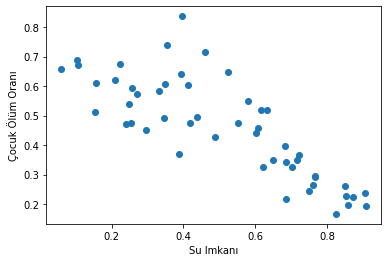

In [60]:
plt.scatter(X.values,y.values)
plt.xlabel('Su Imkanı')
plt.ylabel('Çocuk Ölüm Oranı')

In [61]:
lineer_regresyon = LinearRegression()
lineer_regresyon.fit(X.values.reshape(-1,1),y.values.reshape(-1,1))

LinearRegression()

In [62]:
print(lineer_regresyon.intercept_)
print(lineer_regresyon.coef_)

[0.74570398]
[[-0.56145357]]


In [63]:
print("Elde edilen regresyon modeli: Y={}+{}X".format(lineer_regresyon.intercept_,lineer_regresyon.coef_[0]))

Elde edilen regresyon modeli: Y=[0.74570398]+[-0.56145357]X


### R2 Değeri

In [64]:
y_predicted = lineer_regresyon.predict(X.values.reshape(-1,1))
r2_score(y,y_predicted)

0.6573677595508813

### Ortalama Mutlak ve Ortalama Karesel Hata Değerleri

In [65]:
print("Ortalama Mutlak Hata: {} \nOrtalama Karesel Hata: {}".format(
    mean_absolute_error(y, y_predicted), mean_squared_error(y, y_predicted)))

Ortalama Mutlak Hata: 0.0721970231035461 
Ortalama Karesel Hata: 0.00952626429953057


### Regresyon Gösterimi

Text(0.5, 1.0, 'X y regresyon analiz')

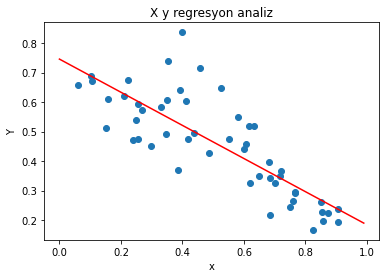

In [66]:
random_x = np.array([0, 0.5, 0.99])
plt.scatter(X.values, y.values)
plt.plot(random_x,
         lineer_regresyon.intercept_[0] +
         lineer_regresyon.coef_[0][0] * random_x,
         color='red',
         label='regresyon grafiği')
plt.xlabel('x')
plt.ylabel('Y')
plt.title('X y regresyon analiz')

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


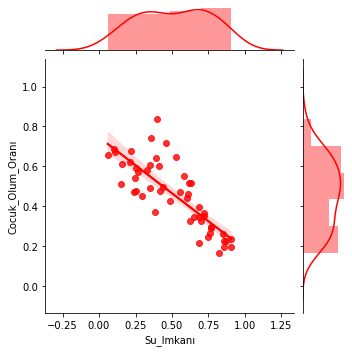

In [68]:
g = sns.jointplot(Analiz_1.Su_Imkanı,Analiz_1.Cocuk_Olum_Oranı,
                  size=5,
                  kind="reg", color="r")